## Section B

In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
 

In [84]:
df = pd.read_csv (r'Real estate.csv')
df


No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 8 columns]

### 1. Linear regression from scratch for K-Fold 

In [85]:
def model(X, Y, learning_rate, epochs):
    
    theta = np.ones((X.shape[1], 1)) 


    for i in range(epochs):
        y_pred = np.dot(X, theta)
        del_theta = (1/Y.size)*np.dot(X.T, y_pred - Y)   # d_theta for gradient descent (Reference)
        theta = theta - learning_rate*del_theta   # Lecture-3 , 11th Slide (Reference)

    return theta   ## Returning the final value of theta after all the epochs


epochs = 100000
learning_rate = 0.0000003

def check_error(X_test , Y_test , theta):
    
    y_pred = np.dot(X_test, theta)

    print("RMSE Error (validation loss) is ")
    print((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)


# We are using del_theta by differentiating theta and then changing it according to gradient descent and then using the learning rate, and then using the theta; we finally got after all the epochs.
# Then we computer RMSE and print it.



#### 2-Fold Validation

In [86]:
fold2_1 = df.loc[0:206]         ######## # 2-Fold validation using indexing                                    
fold2_2 = df.loc[207:413]  


train_val2_1 = fold2_1
test_val2_1 = fold2_2

train_val2_2 = fold2_2
test_val2_2 = fold2_1

In [87]:
## Creating the data folds
Xtrain_2_1 = train_val2_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_2_1 =  train_val2_1[['Y house price of unit area']]

Xtest_2_1  = test_val2_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_2_1  = test_val2_1[['Y house price of unit area']]

Xtrain_2_1 = Xtrain_2_1.values
ytrain_2_1 = ytrain_2_1.values
Xtest_2_1 = Xtest_2_1.values
ytest_2_1 = ytest_2_1.values

###############
Xtrain_2_2 = train_val2_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_2_2 =  train_val2_2[['Y house price of unit area']]

Xtest_2_2  = test_val2_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_2_2  = test_val2_2[['Y house price of unit area']]

Xtrain_2_2 = Xtrain_2_2.values
ytrain_2_2 = ytrain_2_2.values
Xtest_2_2 = Xtest_2_2.values
ytest_2_2 = ytest_2_2.values
error_2 = 0

In [88]:
theta = model(Xtrain_2_2, ytrain_2_2,  learning_rate, epochs)   ##Finding the error
error_2 = error_2 +check_error(Xtest_2_2 , ytest_2_2 ,  theta)

RMSE Error (validation loss) is 
8.532699964334336


In [89]:
theta = model(Xtrain_2_1, ytrain_2_1,  learning_rate, epochs)
error_2 = error_2 +check_error(Xtest_2_1 , ytest_2_1 ,  theta)

RMSE Error (validation loss) is 
10.053264512127068


In [90]:
print("The MEAN RMSE error for K-fold when K is 2 is "+str(error_2/2)+"%")


The MEAN RMSE error for K-fold when K is 2 is 9.292982238230703%


#### 3-Fold Validation

In [91]:
fold3_1 = df.loc[0:137]         ######## # 3-Fold validation                                     
fold3_2 = df.loc[138:275]  
fold3_3 = df.loc[276:413]

train_val3_1 = pd.concat([fold3_1, fold3_2])   
test_val3_1 = fold3_3

train_val3_2 = pd.concat([fold3_1,  fold3_3])
test_val3_2 = fold3_2

train_val3_3 = pd.concat([ fold3_2, fold3_2])
test_val3_3 = fold3_1

In [92]:
Xtrain_3_1 = train_val3_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_3_1 =  train_val3_1[['Y house price of unit area']]

Xtest_3_1  = test_val3_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_3_1  = test_val3_1[['Y house price of unit area']]

Xtrain_3_1 = Xtrain_3_1.values
ytrain_3_1 = ytrain_3_1.values
Xtest_3_1 = Xtest_3_1.values
ytest_3_1 = ytest_3_1.values
###############
Xtrain_3_2 = train_val3_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_3_2 =  train_val3_2[['Y house price of unit area']]

Xtest_3_2  = test_val3_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_3_2  = test_val3_2[['Y house price of unit area']]

Xtrain_3_2 = Xtrain_3_2.values
ytrain_3_2 = ytrain_3_2.values
Xtest_3_2 = Xtest_3_2.values
ytest_3_2 = ytest_3_2.values
###############
Xtrain_3_3 = train_val3_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_3_3 =  train_val3_3[['Y house price of unit area']]

Xtest_3_3  = test_val3_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_3_3  = test_val3_3[['Y house price of unit area']]

Xtrain_3_3 = Xtrain_3_3.values
ytrain_3_3 = ytrain_3_3.values
Xtest_3_3 = Xtest_3_3.values
ytest_3_3 = ytest_3_3.values

error_3 = 0

In [93]:
theta = model(Xtrain_3_1, ytrain_3_1,  learning_rate, epochs)
error_3 = error_3 +check_error(Xtest_3_1 , ytest_3_1 ,  theta)

RMSE Error (validation loss) is 
8.375146601613574


In [94]:
theta = model(Xtrain_3_2, ytrain_3_2,  learning_rate, epochs)
error_3 = error_3 +check_error(Xtest_3_2 , ytest_3_2 ,  theta)

RMSE Error (validation loss) is 
10.485648986940063


In [95]:
theta = model(Xtrain_3_3, ytrain_3_3,  learning_rate, epochs)
error_3 = error_3 +check_error(Xtest_3_3 , ytest_3_3 ,  theta)

RMSE Error (validation loss) is 
8.875109098968306


In [96]:
print("The MEAN RMSE error for K-fold when K is 3 is "+str(error_3/3)+"%")


The MEAN RMSE error for K-fold when K is 3 is 9.245301562507313%


#### 4-Fold Validation

In [97]:
fold4_1 = df.loc[0:103]         ######## # 4-Fold validation                                     
fold4_2 = df.loc[104:207]  
fold4_3 = df.loc[208:311]
fold4_4 = df.loc[312:413]

train_val4_1 = pd.concat([fold4_4, fold4_2, fold4_3])   
test_val4_1 = fold4_1

train_val4_2 = pd.concat([fold4_1, fold4_2, fold4_3])   
test_val4_2 = fold4_3

train_val4_3 = pd.concat([fold4_1, fold4_2, fold4_4])
test_val4_3 = fold4_4

train_val4_4 = pd.concat([fold4_1, fold4_3, fold4_4])
test_val4_4 = fold4_2



In [98]:

Xtrain_4_1 = train_val4_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_4_1 =  train_val4_1[['Y house price of unit area']]

Xtest_4_1  = test_val4_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_4_1  = test_val4_1[['Y house price of unit area']]

Xtrain_4_1 = Xtrain_4_1.values
ytrain_4_1 = ytrain_4_1.values
Xtest_4_1 = Xtest_4_1.values
ytest_4_1 = ytest_4_1.values
###############
Xtrain_4_2 = train_val4_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_4_2 =  train_val4_2[['Y house price of unit area']]

Xtest_4_2  = test_val4_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_4_2  = test_val4_2[['Y house price of unit area']]

Xtrain_4_2 = Xtrain_4_2.values
ytrain_4_2 = ytrain_4_2.values
Xtest_4_2 = Xtest_4_2.values
ytest_4_2 = ytest_4_2.values
###############
Xtrain_4_3 = train_val4_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_4_3 =  train_val4_3[['Y house price of unit area']]

Xtest_4_3  = test_val4_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_4_3  = test_val4_3[['Y house price of unit area']]

Xtrain_4_3 = Xtrain_4_3.values
ytrain_4_3 = ytrain_4_3.values
Xtest_4_3 = Xtest_4_3.values
ytest_4_3 = ytest_4_3.values
######################

Xtrain_4_4 = train_val4_4[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_4_4 =  train_val4_4[['Y house price of unit area']]

Xtest_4_4  = test_val4_4[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_4_4  = test_val4_4[['Y house price of unit area']]

Xtrain_4_4 = Xtrain_4_4.values
ytrain_4_4 = ytrain_4_4.values
Xtest_4_4 = Xtest_4_4.values
ytest_4_4 = ytest_4_4.values
error_4 = 0



In [99]:
theta = model(Xtrain_4_4, ytrain_4_4,  learning_rate, epochs)
error_4 = error_4 + check_error(Xtest_4_4 , ytest_4_4 ,  theta)

RMSE Error (validation loss) is 
8.989943145321277


In [100]:

theta = model(Xtrain_4_2, ytrain_4_2,  learning_rate, epochs)
error_4 = error_4 +check_error(Xtest_4_2 , ytest_4_2 ,  theta)


RMSE Error (validation loss) is 
11.373666976503163


In [101]:
theta = model(Xtrain_4_3, ytrain_4_3,  learning_rate, epochs)
error_4 = error_4 +check_error(Xtest_4_3 , ytest_4_3 ,  theta)

RMSE Error (validation loss) is 
8.414829010762768


In [102]:
theta = model(Xtrain_4_1, ytrain_4_1,  learning_rate, epochs)
error_4 = error_4 +check_error(Xtest_4_1 , ytest_4_1 ,  theta)

RMSE Error (validation loss) is 
7.865525687422206


In [103]:
print("The MEAN RMSE error for K-fold when K is 4 is "+str(error_4/4)+"%")


The MEAN RMSE error for K-fold when K is 4 is 9.160991205002354%


#### 5-Fold Validation

In [104]:
fold5_1 = df.loc[0:82]         ######## # 5-Fold validation                                     
fold5_2 = df.loc[83:164]  
fold5_3 = df.loc[165:247]
fold5_4 = df.loc[248:329]
fold5_5 = df.loc[330:413]


train_val5_1 = pd.concat([fold5_1, fold5_2, fold5_3 , fold5_4])   
test_val5_1 = fold5_5

train_val5_2 = pd.concat([fold5_1, fold5_2, fold5_3 , fold5_5])   
test_val5_2 = fold5_4

train_val5_3 = pd.concat([fold5_1, fold5_2, fold5_4 , fold5_5])   
test_val5_3 = fold5_3

train_val5_4 = pd.concat([fold5_1, fold5_3, fold5_4 , fold5_5])   
test_val5_4 = fold5_2

train_val5_5 = pd.concat([fold5_2, fold5_3, fold5_4 , fold5_5])   
test_val5_5 = fold5_1

In [105]:

Xtrain_5_1 = train_val5_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_5_1 =  train_val5_1[['Y house price of unit area']]

Xtest_5_1  = test_val5_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_5_1  = test_val5_1[['Y house price of unit area']]

Xtrain_5_1 = Xtrain_5_1.values
ytrain_5_1 = ytrain_5_1.values
Xtest_5_1 = Xtest_5_1.values
ytest_5_1 = ytest_5_1.values
###############
Xtrain_5_2 = train_val5_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_5_2 =  train_val5_2[['Y house price of unit area']]

Xtest_5_2  = test_val5_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_5_2  = test_val5_2[['Y house price of unit area']]

Xtrain_5_2 = Xtrain_5_2.values
ytrain_5_2 = ytrain_5_2.values
Xtest_5_2 = Xtest_5_2.values
ytest_5_2 = ytest_5_2.values
###############
Xtrain_5_3 = train_val5_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_5_3 =  train_val5_3[['Y house price of unit area']]

Xtest_5_3  = test_val5_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_5_3  = test_val5_3[['Y house price of unit area']]

Xtrain_5_3 = Xtrain_5_3.values
ytrain_5_3 = ytrain_5_3.values
Xtest_5_3 = Xtest_5_3.values
ytest_5_3 = ytest_5_3.values
######################

Xtrain_5_4 = train_val5_4[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_5_4 =  train_val5_4[['Y house price of unit area']]

Xtest_5_4  = test_val5_4[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_5_4  = test_val5_4[['Y house price of unit area']]

Xtrain_5_4 = Xtrain_5_4.values
ytrain_5_4 = ytrain_5_4.values
Xtest_5_4 = Xtest_5_4.values
ytest_5_4 = ytest_5_4.values
########################

Xtrain_5_5 = train_val5_5[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_5_5 =  train_val5_5[['Y house price of unit area']]

Xtest_5_5  = test_val5_5[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_5_5  = test_val5_5[['Y house price of unit area']]

Xtrain_5_5 = Xtrain_5_5.values
ytrain_5_5 = ytrain_5_5.values
Xtest_5_5 = Xtest_5_5.values
ytest_5_5 = ytest_5_5.values

error_5 = 0

In [106]:
theta = model(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs)
error_5 = error_5 +check_error(Xtest_5_1 , ytest_5_1 ,  theta)

RMSE Error (validation loss) is 
7.99502559440744


In [107]:
theta = model(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
error_5 = error_5 +check_error(Xtest_5_2 , ytest_5_2 ,  theta)

RMSE Error (validation loss) is 
12.133008492868223


In [108]:
theta = model(Xtrain_5_3, ytrain_5_3,  learning_rate, epochs)
error_5 = error_5 +check_error(Xtest_5_3 , ytest_5_3 ,  theta)

RMSE Error (validation loss) is 
8.019076440891384


In [109]:
theta = model(Xtrain_5_4, ytrain_5_4,  learning_rate, epochs)
error_5 = error_5 +check_error(Xtest_5_4 , ytest_5_4 ,  theta)

RMSE Error (validation loss) is 
9.571154949947632


In [110]:
theta = model(Xtrain_5_5, ytrain_5_5,  learning_rate, epochs)
error_5 = error_5 +check_error(Xtest_5_5 , ytest_5_5 ,  theta)

RMSE Error (validation loss) is 
7.882852238542636


In [111]:
print("The MEAN RMSE error for K-fold when K is 5 is "+str(error_5/5)+"%")


The MEAN RMSE error for K-fold when K is 5 is 9.120223543331463%


In [112]:
print("The MEAN RMSE error for K-fold when K is 2 is "+str(error_2/2))
print("The MEAN RMSE error for K-fold when K is 3 is "+str(error_3/3))
print("The MEAN RMSE error for K-fold when K is 4 is "+str(error_4/4))
print("The MEAN RMSE error for K-fold when K is 5 is "+str(error_5/5))


The MEAN RMSE error for K-fold when K is 2 is 9.292982238230703
The MEAN RMSE error for K-fold when K is 3 is 9.245301562507313
The MEAN RMSE error for K-fold when K is 4 is 9.160991205002354
The MEAN RMSE error for K-fold when K is 5 is 9.120223543331463


#### The K-Fold Values for K = 3 ,4 ,5 are similiar, we will take k = 5 as it has lowest RMSE

### 2. Plotting the RMSE V/s iteration graph for all models trained with K = 5

In [113]:
def plotrvi(X, Y, learning_rate, epochs):
    
    theta = np.ones((X.shape[1], 1)) 
    cost_list = [] 
    rmse_list = []
    m = Y.size
    err_lst = []
    

    for i in range(epochs):
        y_pred = np.dot(X, theta)
        del_theta = (1/Y.size)*np.dot(X.T, y_pred - Y)   # d_theta for gradient descent
        theta = theta - learning_rate*del_theta   # Lecture-3 , 11th Slide
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))  # Lecture-4 , 14th Slide
        cost_list.append(cost)
        err = ((np.sum(((abs(Y - y_pred))**2))/Y.shape[0])**0.5)
        err_lst.append(err)

    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

    rng = np.arange(0, epochs)  #RMSE graph
    ax1.plot(rng, err_lst)

    ax2.plot(rng[100:] , err_lst[100:] )


    ax1.set_title("RMSE vs. iteration");  ax2.set_title("RMSE vs. iteration (tail)")  ## for plotting the curve
    ax1.set_ylabel('RMSE')             ;  ax2.set_ylabel('RMSE') 
    ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
    plt.show()
epochs = 100000
learning_rate = 0.0000003

The Graph will be plotted on the train value set

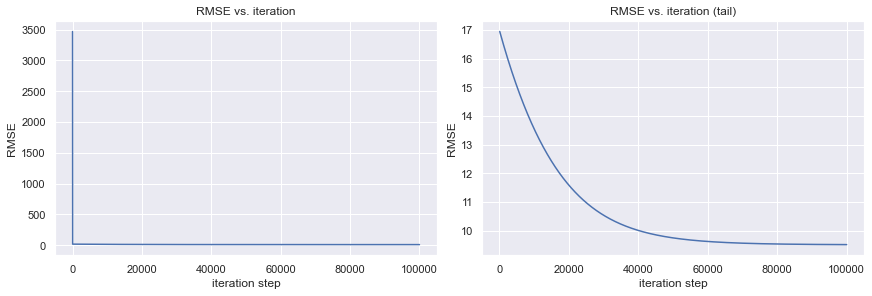

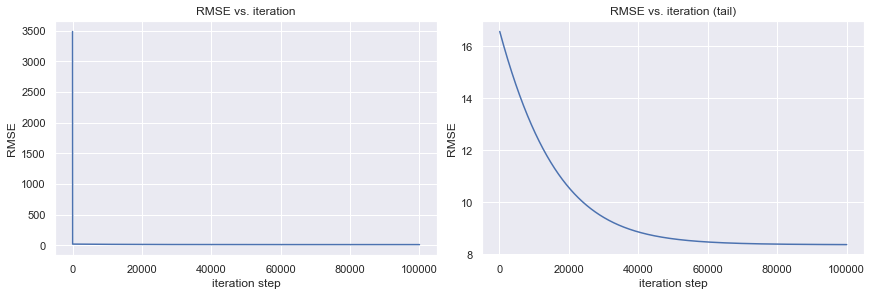

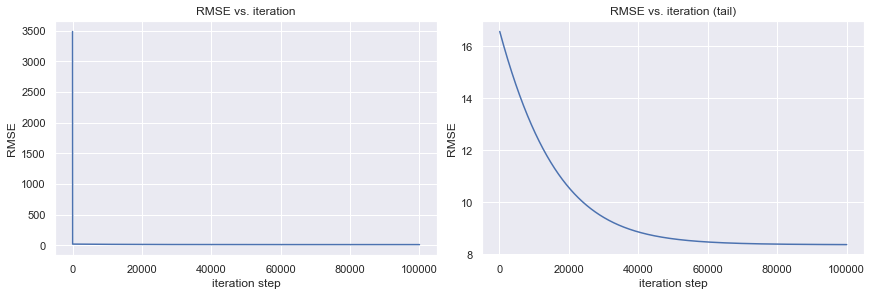

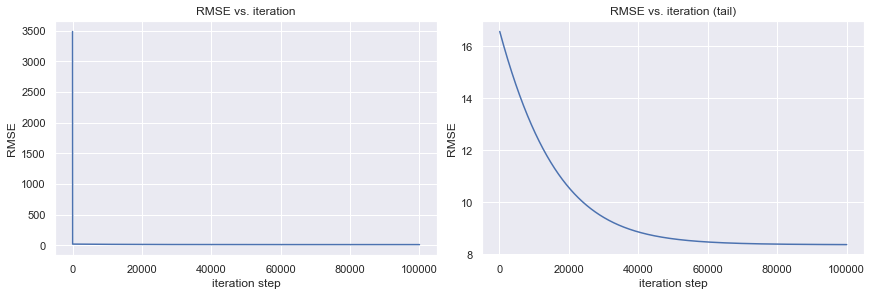

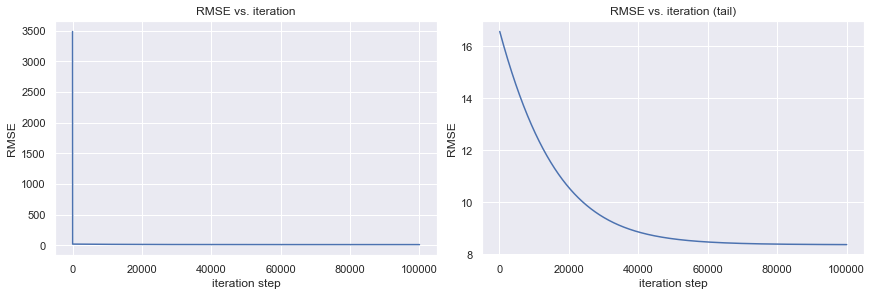

In [114]:
theta = plotrvi(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs)
theta = plotrvi(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
theta = plotrvi(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
theta = plotrvi(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
theta = plotrvi(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)


### C. Modify Regression implementation by including L1 (LASSO) and L2 (Ridge Regression) regularization.

##### Lasso Regularization L1 Loss

In [115]:
def Lasso(X, Y, learning_rate, epochs):
    
    W = np.zeros((X.shape[1], 1)) 
    b= 3
    alpha = 0.00005

    for i in range(epochs):
        y_pred = np.dot(X, W)  
        LW = (-(2*(X.T).dot(Y - y_pred)) + (alpha))  /X.shape[0]  # Lecture-6 Slide 20 (Reference)
        W -= learning_rate*LW

    return W

epochs = 100000
learning_rate = 0.00000003

def check_errorl1(X_test , Y_test , theta ):
    
    y_pred = np.dot(X_test, theta)


    print("Training Error is ")
    print( (np.sum(((abs(Y_test - y_pred))))/Y_test.shape[0]) )
   
    
    print("RMSE Error (validation loss) is ")
    print((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    
    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    

error_5_0 = 0


# Here we are changing the theta (W) using the parameters according to the Lasso regularisation and then changing it using the learning rate,
#  and then finally using it after running all the epochs. Then we calculate the training and the validation error.


In [116]:
W = Lasso(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs)
error_5_0 = error_5_0 +check_errorl1(Xtest_5_1 , ytest_5_1 , W )

Training Error is 
6.204479328684476
RMSE Error (validation loss) is 
8.463902827872234


In [117]:
W = Lasso(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
error_5_0 = error_5_0 +check_errorl1(Xtest_5_2 , ytest_5_2 , W )

Training Error is 
8.124154742861855
RMSE Error (validation loss) is 
12.528291162682908


In [118]:
W = Lasso(Xtrain_5_3, ytrain_5_3,  learning_rate, epochs)
error_5_0 = error_5_0 +check_errorl1(Xtest_5_3 , ytest_5_3 , W )

Training Error is 
6.265300323093634
RMSE Error (validation loss) is 
8.812506829262606


In [119]:
W = Lasso(Xtrain_5_4, ytrain_5_4,  learning_rate, epochs)
error_5_0 = error_5_0 +check_errorl1(Xtest_5_4 , ytest_5_4 , W )

Training Error is 
7.250823920693365
RMSE Error (validation loss) is 
9.90730258761917


In [120]:
W = Lasso(Xtrain_5_5, ytrain_5_5,  learning_rate, epochs)
error_5_0 = error_5_0 +check_errorl1(Xtest_5_5 , ytest_5_5 , W )

Training Error is 
6.6820729319740595
RMSE Error (validation loss) is 
8.56121690121462


In [121]:
print("The RMSE error for Lasso Regularization when K is 5 is "+str(error_5_0/5))


The RMSE error for Lasso Regularization when K is 5 is 9.654644061730309


##### The RMSE is coming 9.654644061943909 for Lasso regularization

In [122]:
epochs = 100000
learning_rate = 0.00000003

def PlotLasso(X, Y, learning_rate, epochs , X_test , Y_test):
    
    W = np.zeros((X.shape[1], 1)) 
    b= 3
    alpha = 0.000005
    err_lst=[]
    train_err_lst=[]
    # print(W.shape)

    for i in range(epochs):
        y_pred = np.dot(X, W)  
        LW = (-(2*(X.T).dot(Y - y_pred)) + (alpha))  /X.shape[0]  # Lecture-6 Slide 20 (Reference)
        W -= learning_rate*LW
        y_pred = np.dot(X, W)
        err = (np.sum(((abs(Y - y_pred))**2))/Y.shape[0])**0.5   ## val loss
        train_err = (np.sum(((abs(Y - y_pred))))/Y.shape[0])
        err_lst.append(err)    ## adding the error to the list
        train_err_lst.append(train_err)

    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

    rng = np.arange(0, epochs)  #RMSE graph
    ax1.plot(rng, err_lst, label = "Validation Error")
    ax1.plot(rng , train_err_lst , label = "Training Error")

    ax2.plot(rng[100:] , err_lst[100:] , label = "Validation Error" )
    ax2.plot(rng[100:] , train_err_lst[100:] , label = "Training Error")

    ax1.set_title("Error vs. iteration");  ax2.set_title("Error vs. iteration (tail)")
    ax1.set_ylabel('RMSE')             ;  ax2.set_ylabel('RMSE') 
    ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
    plt.show()

    # return W
    theta = W

    y_pred = np.dot(X_test, theta)

    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    



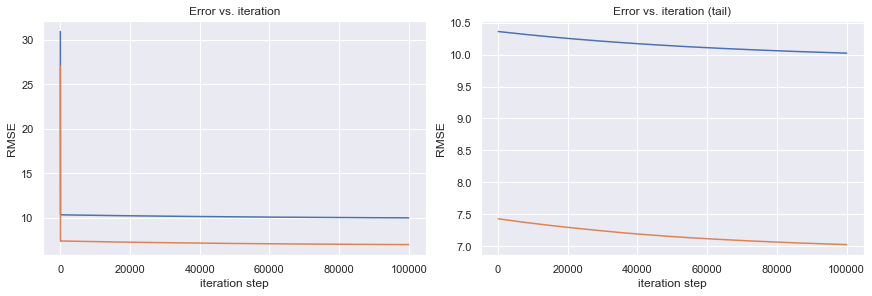

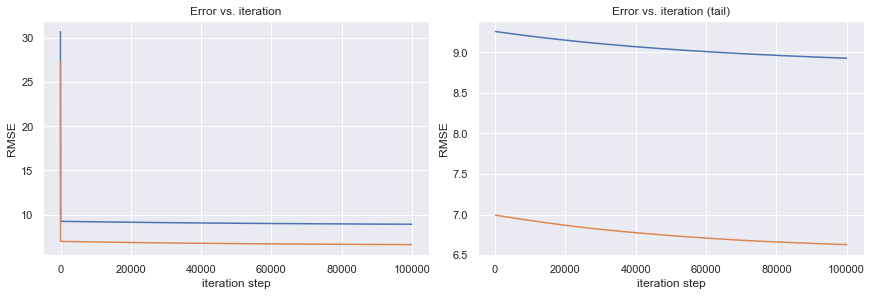

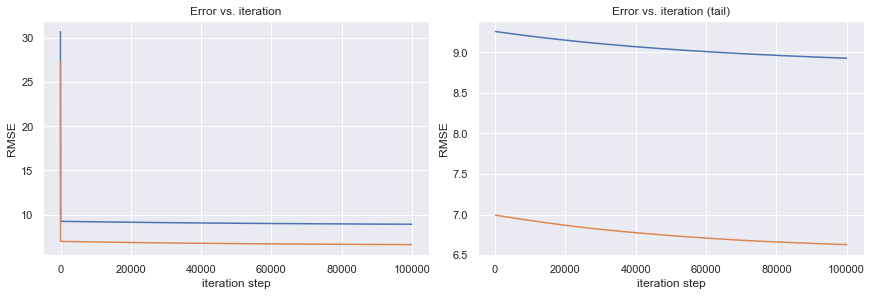

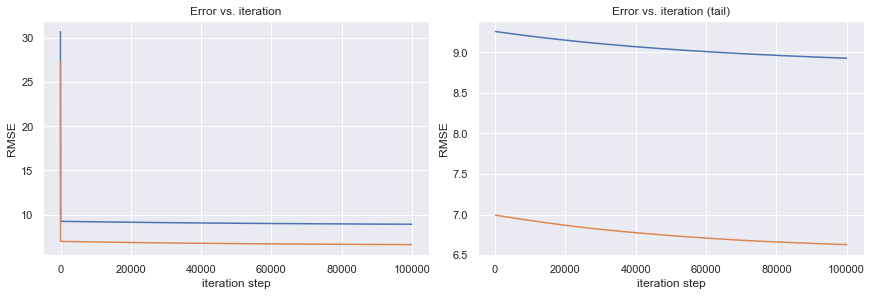

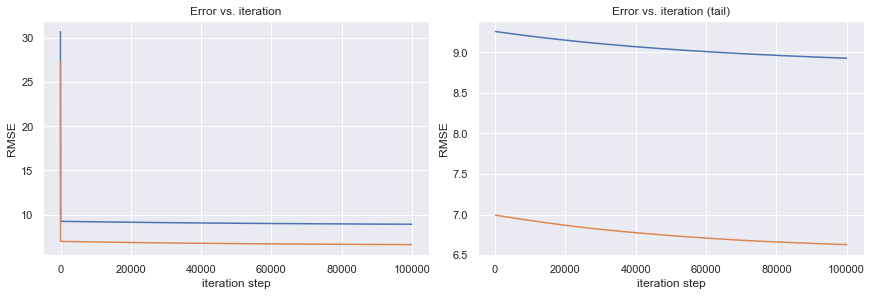

In [123]:
theta = PlotLasso(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs , Xtest_5_1 , ytest_5_1)
theta = PlotLasso(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_2 , ytest_5_2)
theta = PlotLasso(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_3 , ytest_5_3)
theta = PlotLasso(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_4 , ytest_5_4)
theta = PlotLasso(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_5 , ytest_5_5)


#### Ridge Regularization L2 Loss

In [124]:
def Ridge(X, Y, learning_rate, epochs):
    
    W = np.zeros((X.shape[1], 1)) 
    b= 3
    alpha = 0.00005
    print(W.shape)

    for i in range(epochs):
        y_pred = np.dot(X, W)  
        LW = (-(2*(X.T).dot(Y - y_pred)) + (2*alpha*W))  /X.shape[0]  # Lecture-6 Slide 13
        W -= learning_rate*LW

    return W

epochs = 100000
learning_rate = 0.00000003

def check_errorl2(X_test , Y_test , theta ):
    
    y_pred = np.dot(X_test, theta)


    print("Training Error is ")
    print( (np.sum(((abs(Y_test - y_pred))))/Y_test.shape[0]) )
   
    
    print("RMSE Error (validation loss) is ")
    print((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    
    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    

error_5 = 0


# Here we are changing the theta (W) using the parameters according to the Ridge regression and then changing it using the learning rate,
# and then finally using it after running all the epochs. Then we calculate the training and the validation error.


In [125]:
W = Ridge(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs)
error_5 = error_5 +check_errorl2(Xtest_5_1 , ytest_5_1 , W )

(6, 1)
Training Error is 
6.204479328828235
RMSE Error (validation loss) is 
8.4639028276228


In [126]:
W = Ridge(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
error_5 = error_5 +check_errorl2(Xtest_5_2 , ytest_5_2 , W )

(6, 1)
Training Error is 
8.124154743045583
RMSE Error (validation loss) is 
12.528291162841025


In [127]:
W = Ridge(Xtrain_5_3, ytrain_5_3,  learning_rate, epochs)
error_5 = error_5 +check_errorl2(Xtest_5_3 , ytest_5_3 , W )

(6, 1)
Training Error is 
6.2653003231372475
RMSE Error (validation loss) is 
8.812506829278151


In [128]:
W = Ridge(Xtrain_5_4, ytrain_5_4,  learning_rate, epochs)
error_5 = error_5 +check_errorl2(Xtest_5_4 , ytest_5_4 , W )

(6, 1)
Training Error is 
7.250823921349585
RMSE Error (validation loss) is 
9.907302587889326


In [129]:
W = Ridge(Xtrain_5_5, ytrain_5_5,  learning_rate, epochs)
error_5 = error_5 +check_errorl2(Xtest_5_5 , ytest_5_5 , W )

(6, 1)
Training Error is 
6.682072932762071
RMSE Error (validation loss) is 
8.561216902088251


In [130]:
print("The RMSE error for Ridge Regularization when K is 5 is "+str(error_5/5))


The RMSE error for Ridge Regularization when K is 5 is 9.654644061943909


#### The RMSE is coming 9.654644061943909 for Ridge regularization

In [131]:
epochs = 100000
learning_rate = 0.00000003

def PlotRidge(X, Y, learning_rate, epochs , X_test , Y_test):
    
    W = np.zeros((X.shape[1], 1)) 
    b= 3
    alpha = 0.000005
    err_lst=[]
    train_err_lst=[]
    # print(W.shape)

    for i in range(epochs):
        y_pred = np.dot(X, W)  
        LW = (-(2*(X.T).dot(Y - y_pred)) + (2*alpha*W))  /X.shape[0]  # Lecture-6 Slide 13 (Reference) 
        W -= learning_rate*LW
        y_pred = np.dot(X, W)
        err = (np.sum(((abs(Y - y_pred))**2))/Y.shape[0])**0.5   ## val loss
        train_err = (np.sum(((abs(Y - y_pred))))/Y.shape[0])    
        err_lst.append(err)     ## adding the error to the lost
        train_err_lst.append(train_err)

    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

    rng = np.arange(0, epochs)  #RMSE graph
    ax1.plot(rng, err_lst, label = "Validation Error")
    ax1.plot(rng , train_err_lst , label = "Training Error")

    ax2.plot(rng[100:] , err_lst[100:] , label = "Validation Error" )
    ax2.plot(rng[100:] , train_err_lst[100:] , label = "Training Error")

    ax1.set_title("Error vs. iteration");  ax2.set_title("Error vs. iteration (tail)")
    ax1.set_ylabel('RMSE')             ;  ax2.set_ylabel('RMSE') 
    ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
    plt.show()

    # return W
    theta = W

    y_pred = np.dot(X_test, theta)

    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    

error_5 = 0


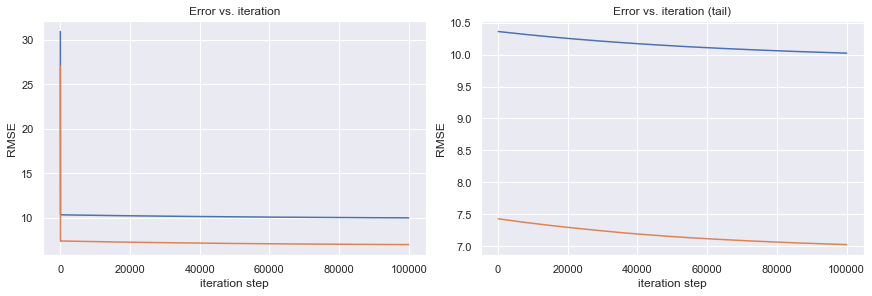

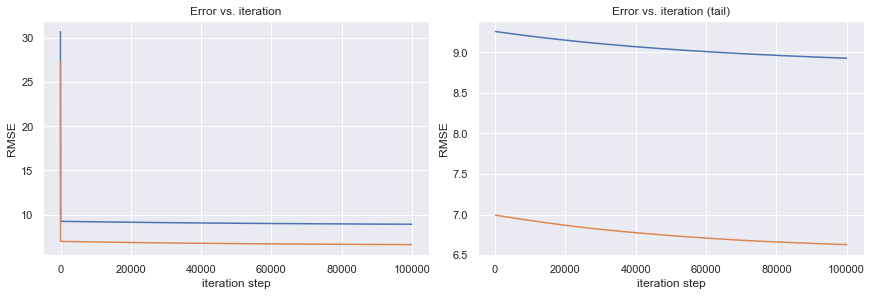

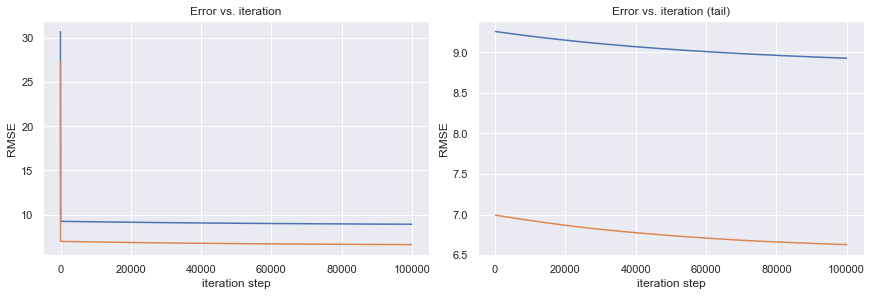

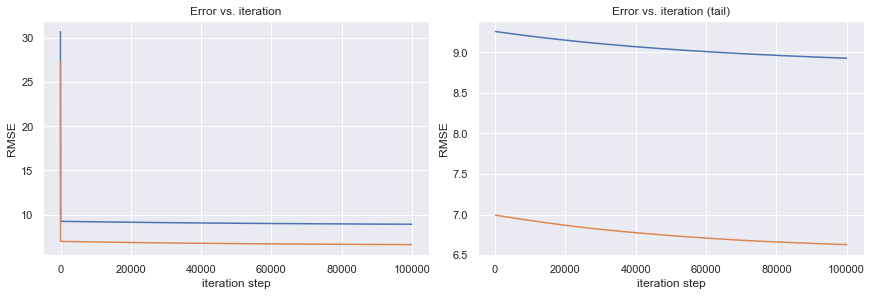

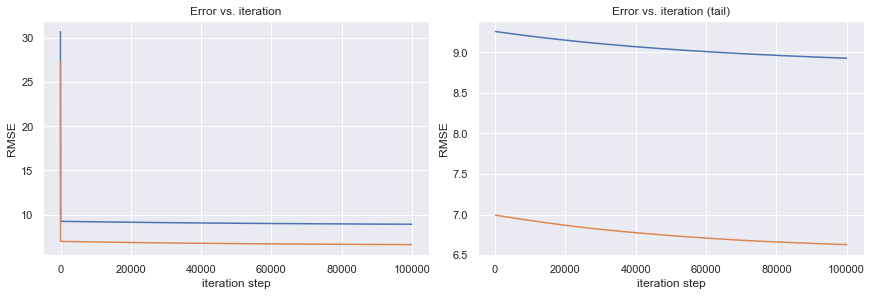

In [132]:
theta = PlotRidge(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs , Xtest_5_1 , ytest_5_1)
theta = PlotRidge(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_2 , ytest_5_2)
theta = PlotRidge(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_3 , ytest_5_3)
theta = PlotRidge(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_4 , ytest_5_4)
theta = PlotRidge(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_5 , ytest_5_5)


#### (d) Implement the normal equation (closed form) for linear regression

In [133]:
def Normal(X, Y, learning_rate, epochs):
    
    theta = np.ones((X.shape[1], 1)) 

    theta = ( np.linalg.inv((X.T.dot(X))) ).dot(X.T).dot(Y)   ## Implemented the Normal equation

    return theta

def check_error(X_test , Y_test , theta):
    
    y_pred = np.dot(X_test, theta)

    print("RMSE Error (validation loss) is ")
    print((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)

error_5_1=0

# W = (XT.X)^-1.XT.Y
# Where W is our Theta. 


# Here we have used the Normal equation to find the value of theta and used it to find the predicted values.



In [134]:
theta = Normal(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs)
error_5_1 = error_5_1 +check_error(Xtest_5_1 , ytest_5_1 ,  theta)

RMSE Error (validation loss) is 
7.787734153468953


In [135]:
theta = Normal(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
error_5_1 = error_5_1 +check_error(Xtest_5_2 , ytest_5_2 ,  theta)

RMSE Error (validation loss) is 
11.67918817407055


In [136]:
theta = Normal(Xtrain_5_3, ytrain_5_3,  learning_rate, epochs)
error_5_1 = error_5_1 +check_error(Xtest_5_3 , ytest_5_3 ,  theta)

RMSE Error (validation loss) is 
7.628155508171655


In [137]:
theta = Normal(Xtrain_5_4, ytrain_5_4,  learning_rate, epochs)
error_5_1 = error_5_1 +check_error(Xtest_5_4 , ytest_5_4 ,  theta)

RMSE Error (validation loss) is 
9.428225030142785


In [138]:
theta = Normal(Xtrain_5_5, ytrain_5_5,  learning_rate, epochs)
error_5_1 = error_5_1 +check_error(Xtest_5_5 , ytest_5_5 ,  theta)

RMSE Error (validation loss) is 
7.2114321750311055


In [139]:
print("The MEAN RMSE error for Normal Equation for K = 5 is "+str(error_5_1/5)+"%")

The MEAN RMSE error for Normal Equation for K = 5 is 8.74694700817701%


## Section C

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')
 


In [141]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

#### a) Class distribution
We can observe that we have least number of dry beans of Bombay Variety and most number of beans of of Dermason variety

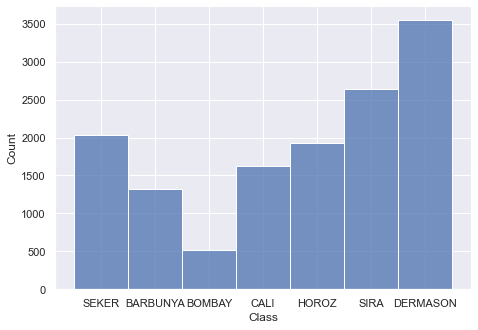

In [142]:

graph  = sns.displot(df, x="Class")
graph.fig.set_figwidth(7.27)
graph.fig.set_figheight(4.7) 



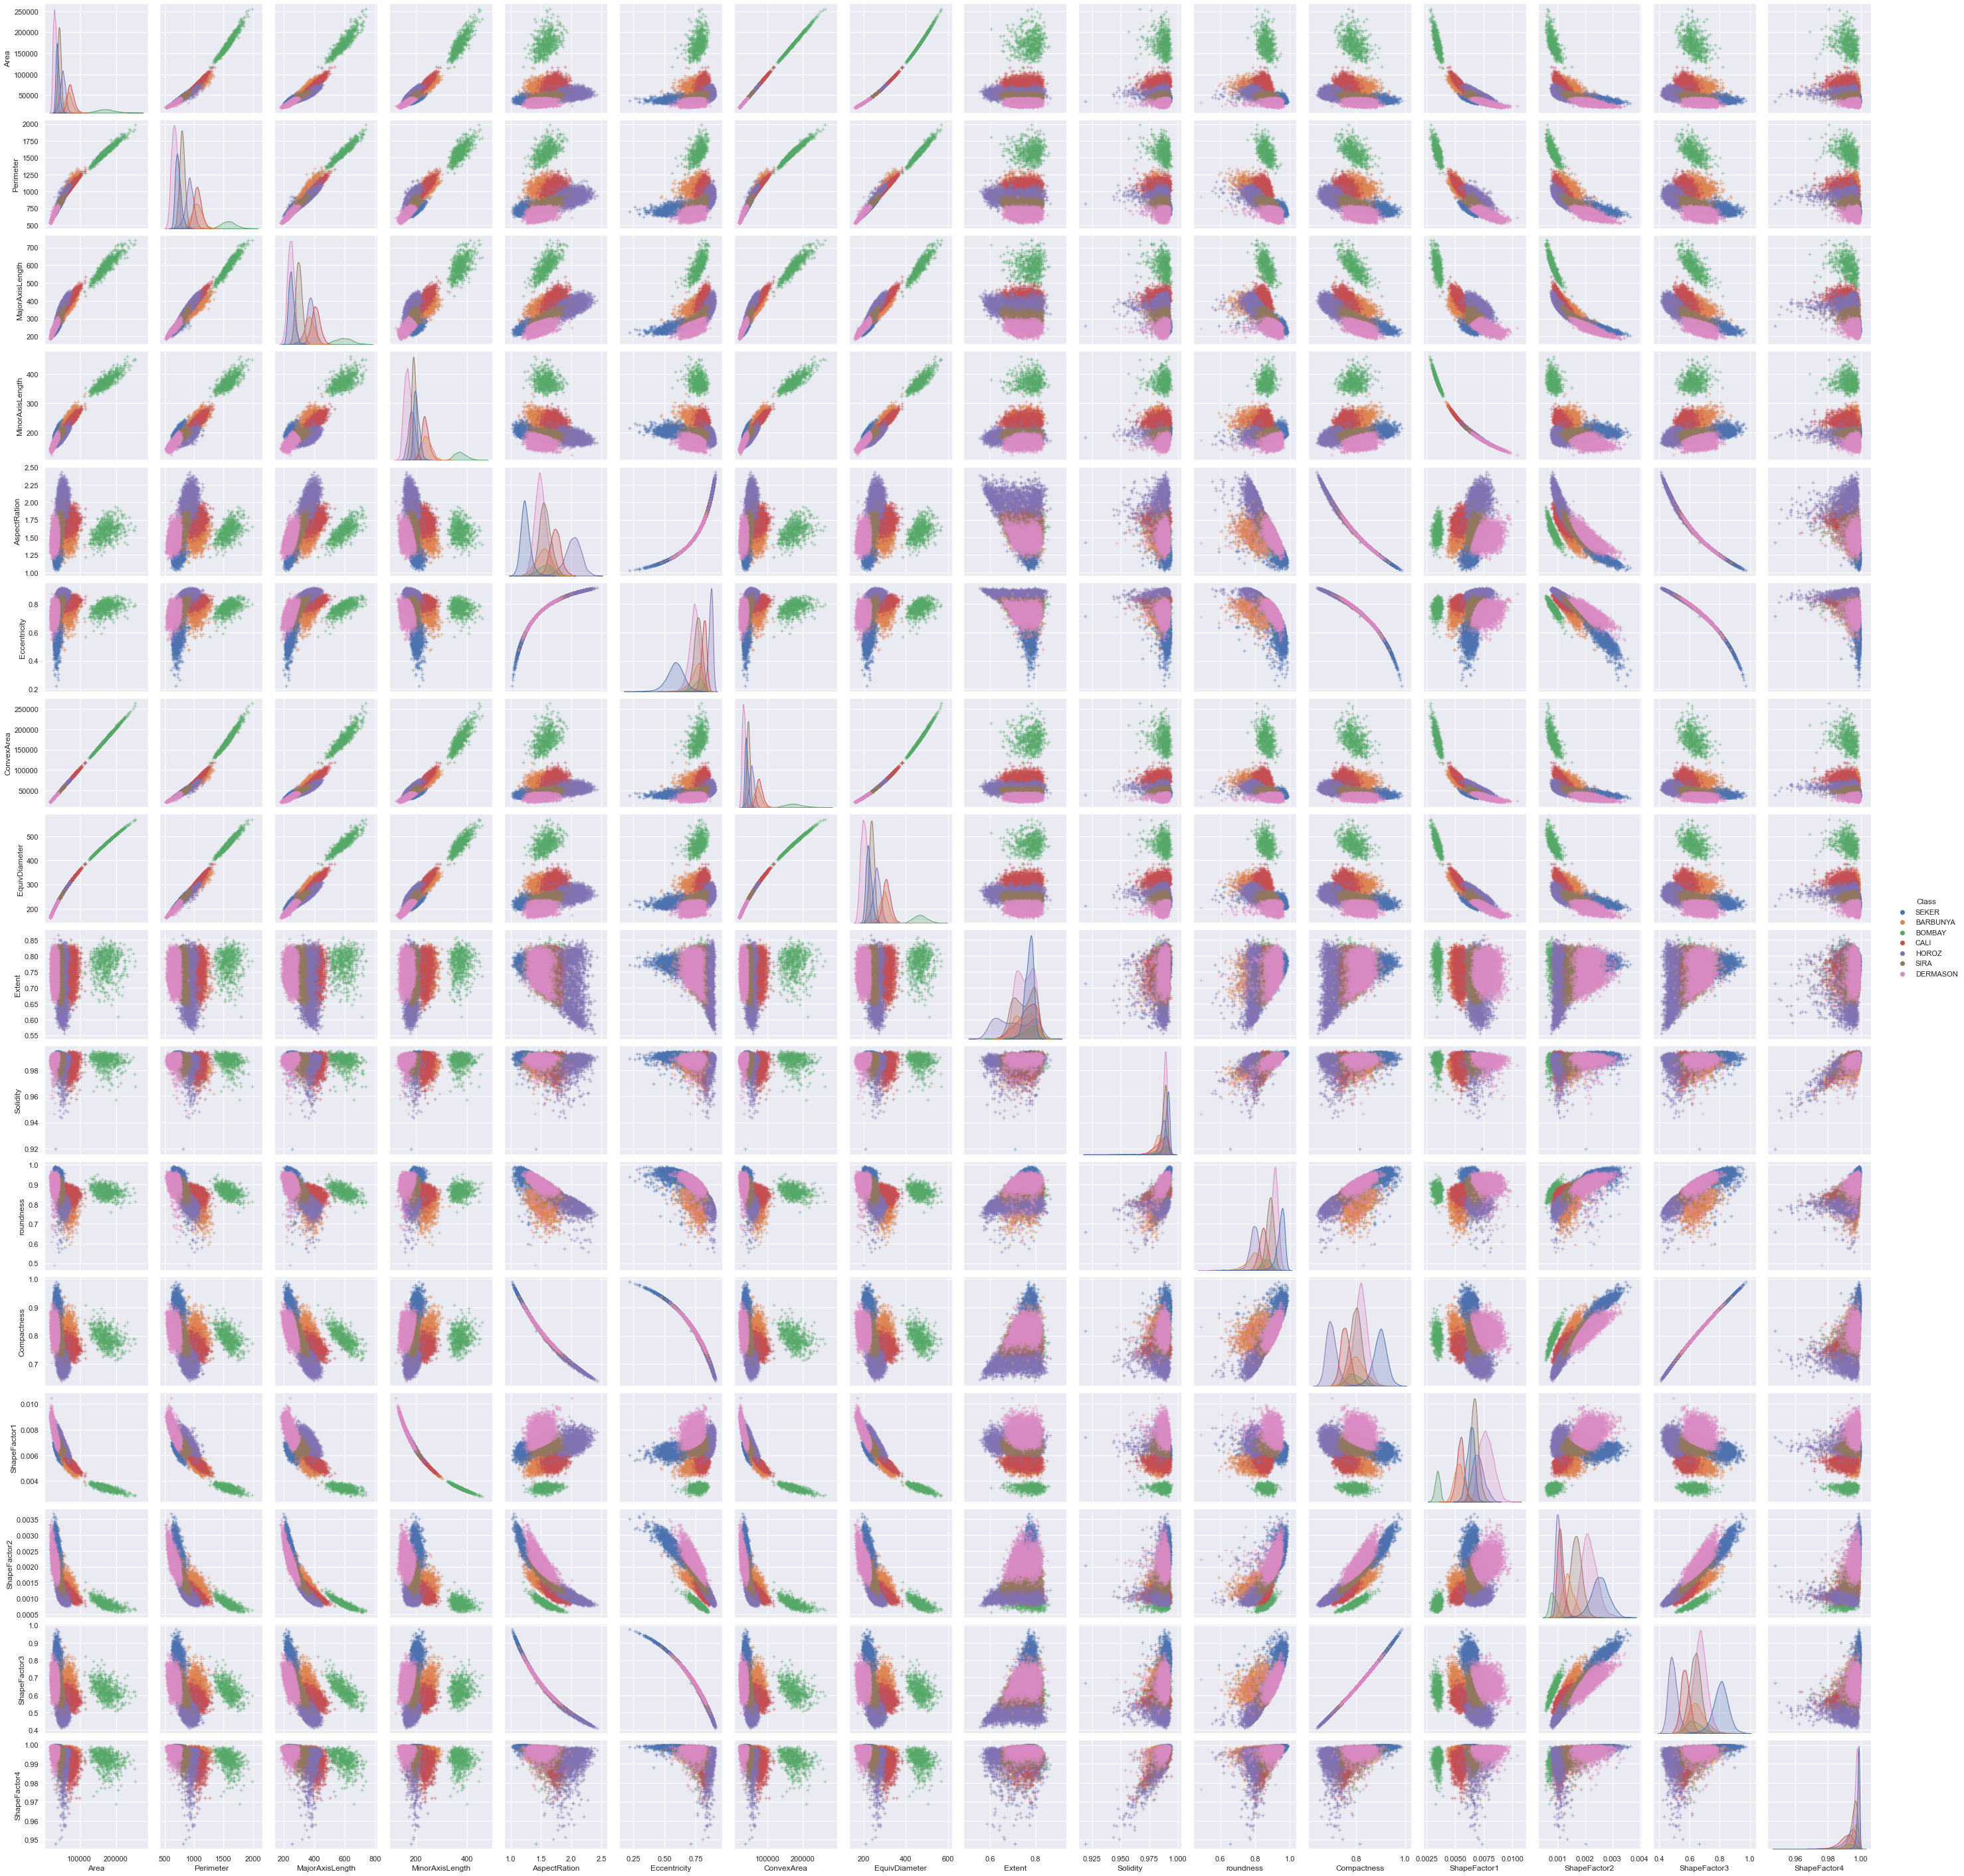

In [143]:
g = sns.pairplot(df, hue='Class', markers='+')

#### b) EDA

##### (i) BoxPlot for Eccentrvity - As we can see below , that many values less that 0.6 are outliers and cause major deviation to the data

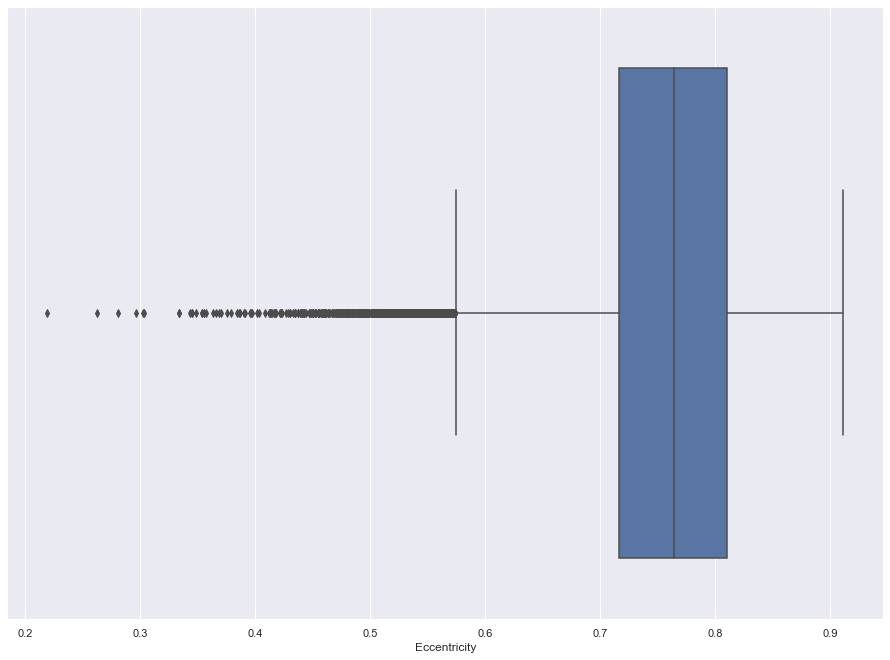

In [144]:
graph = sns.boxplot(x='Eccentricity', data=df)  

##### (ii) Scatter Plot for Area/Perimeter  - 
Here we can see that the graph is non linear as the rate with which Area increases as permeter increases (m - slope) is increasing
We can Also see that the BOMBAY beans are the the biggest with largest area and perimeter
And the DERMASON are the smallest

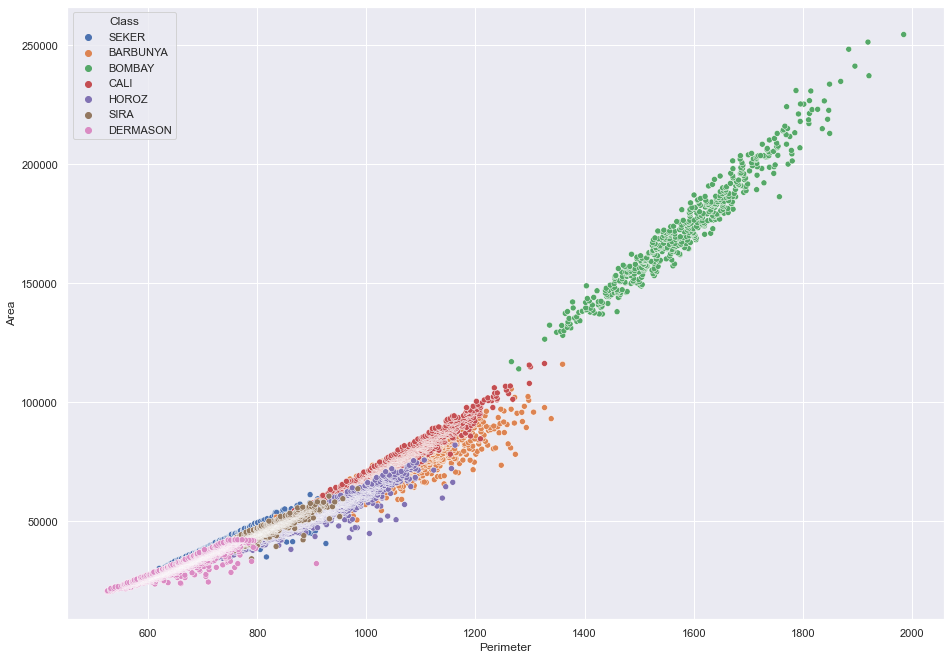

In [145]:
# df.plot.scatter(x = 'Perimeter', y = 'Area', s = 1)
graph = sns.scatterplot(x = 'Perimeter' , y='Area' , hue='Class' , data=df)



##### (iii) Scatter Plot for Roundness/Class  -
Here we can see  that SEKER are the most round and compact beans, whereas the HOROZ are least round and compact
The compactness and roundness of BOMBAY beans are somewhat between SEKER and HOROZ

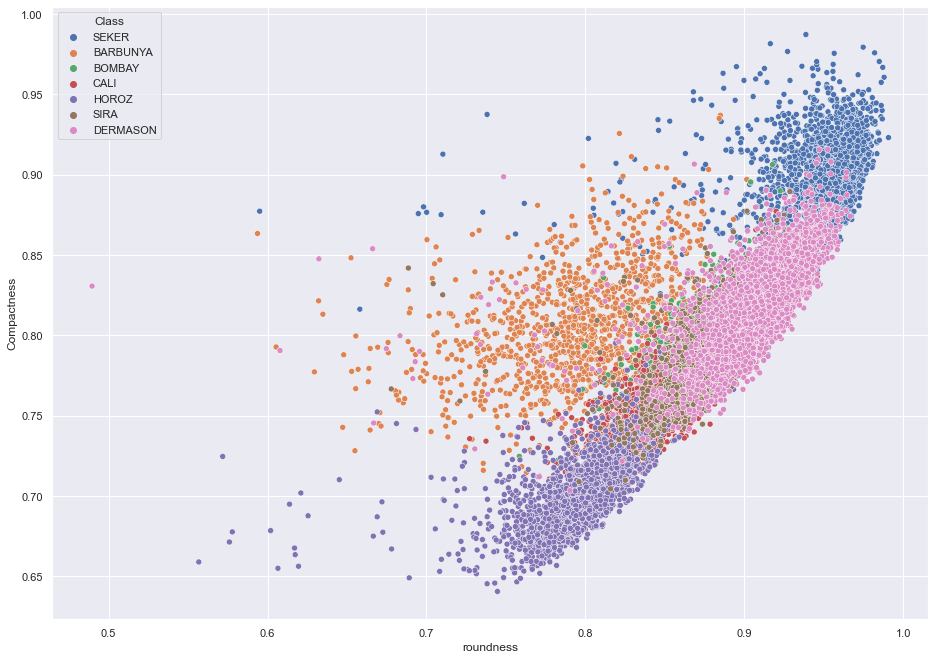

In [146]:
graph = sns.scatterplot(x = 'roundness' , y='Compactness' , hue='Class' , data=df)


##### iv. Graph between area and extent : Here we can see how all beans lie in same range of except HOROZ which has larger extent range.
We can also see that BOMBAY is very much different from others in Area

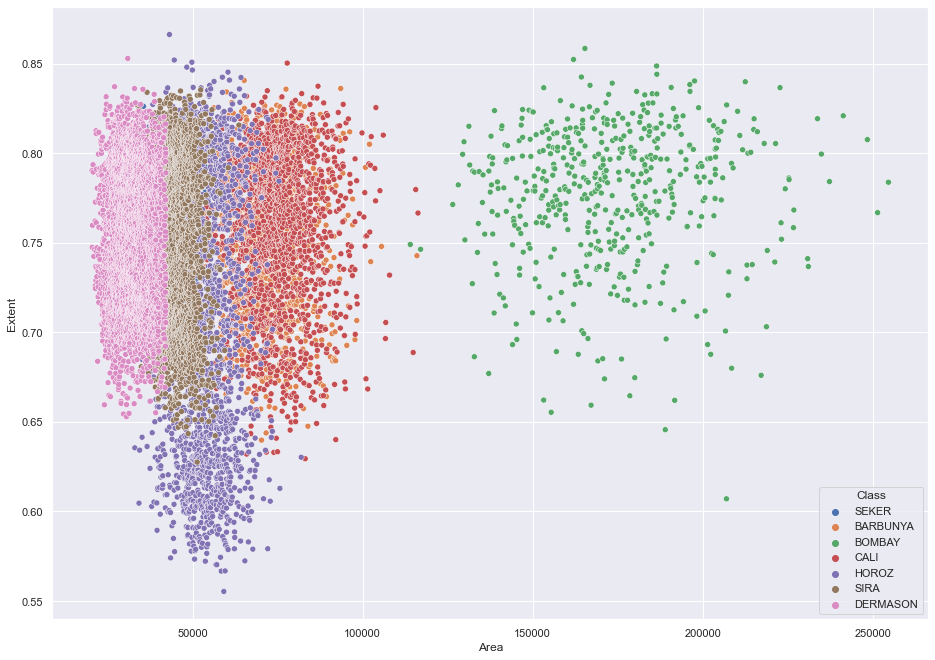

In [147]:
graph = sns.scatterplot(x = 'Area' , y='Extent' , hue='Class' , data=df)


##### v. Graph between Eccentricity and Aspect Ratio : We can see that this is an exponential curve
SEKER has the least eccentricity and least Aspect Ratio
While HOROZ has the highest Eccentricity and hightest Aspect Ration

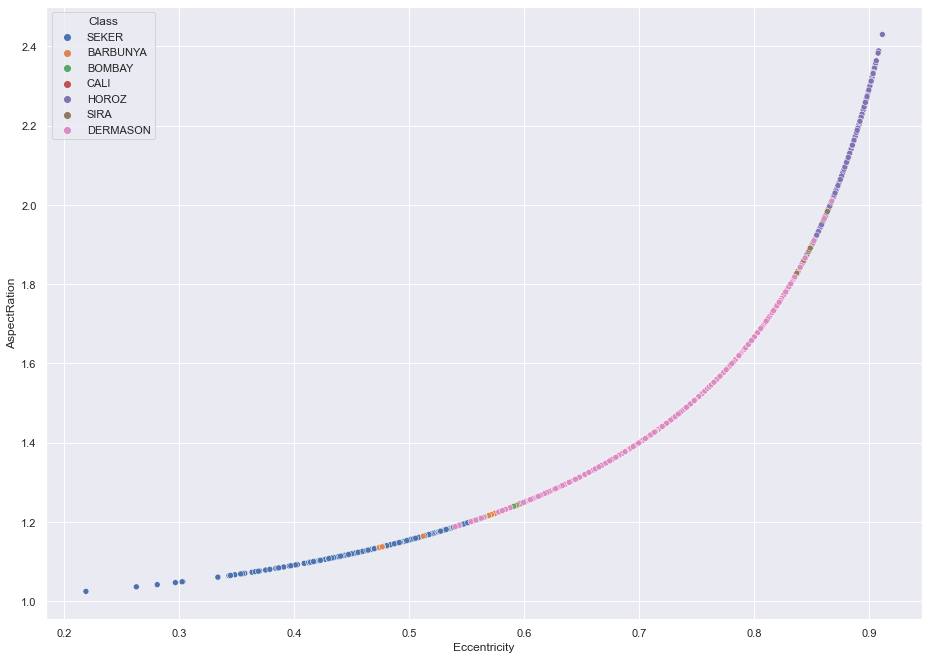

In [148]:
graph = sns.scatterplot(x = 'Eccentricity' , y='AspectRation', hue='Class'  , data=df)


Missing Values in the data set

In [149]:
df.isnull().sum()  ## there are no null values in the data set.



Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### C ) Use TSNE (t-distributed stochastic neighbor embedding) algorithm to reduce data dimensions to 2

In [150]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df[df.columns[0:16].values])
tsne_features[ 1:4,:]

df['x'] = tsne_features [ : , 0]
df['y' ] = tsne_features [:,1] 

## Reference Taken from scikit-learn.org


# This will add 2 new columns to the df if needed in case of future use

ScatterPlot

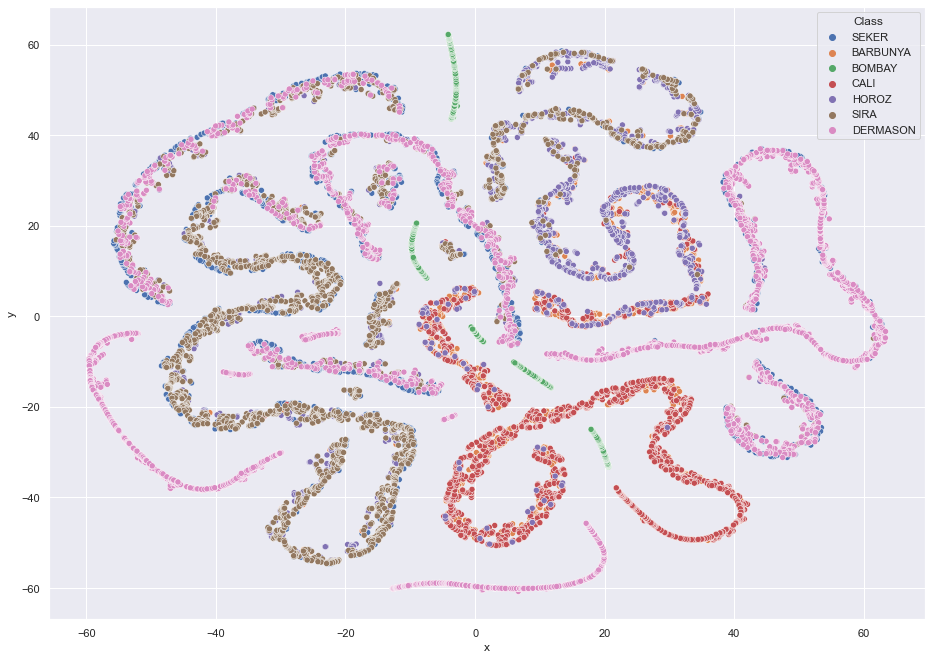

In [151]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,11.27)})

graph = sns.scatterplot(x = 'x' , y='y' , hue='Class' , data=df)


We can infer that HOROZ and CALI are similiar to each other
Also are HOROZ and SIRA
SEKER and SIRA are also similiar
SEKER and DERAMASON are also similiar
SEKER, CALI and BARBUNIYA are also simliar
CALI and BARBUNIYA are most similiar to each other
However DERAMASON is different from others in some aspects
However BOMBAY is completely different from all others

#### 4. Naive Bayes


i.  Multinomial Naive Bayes

In [152]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_MNV = df[df.columns[19:20]]
X_MNV = df[df.columns[0:16]]
X_train_MNV, X_test_MNV, y_train_MNV, y_test_MNV = train_test_split(X_MNV, y_MNV, test_size=0.2, random_state=0)

clf = MultinomialNB()
# df

## Reference Taken from scikit-learn.org

# Multinomial Naive Bayes is used for multinomial models, suitable for classification with discrete (integer) features.


We have added one more column ClassCode which represents Class but  in integer form

In [153]:
clf.fit(X_MNV, y_MNV)
MultinomialNB()
y_pred_MNV = clf.predict(X_test_MNV)
y_pred_MNV = y_pred_MNV.reshape(y_pred_MNV.shape[0] , 1)
print("Number of mislabeled points out of a total %d points : %d"% (X_test_MNV.shape[0], (y_test_MNV != y_pred_MNV).sum()))

## Reference Taken from scikit-learn.org





Number of mislabeled points out of a total 2723 points : 582


In [154]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_MNV , y_pred_MNV))

print(classification_report(y_test_MNV , y_pred_MNV)) 

Accuracy Score 0.786265148733015
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       255
           1       1.00      1.00      1.00        92
           2       0.77      0.72      0.74       350
           3       0.87      0.87      0.87       735
           4       0.82      0.77      0.80       390
           5       0.77      0.76      0.77       376
           6       0.73      0.81      0.77       525

    accuracy                           0.79      2723
   macro avg       0.79      0.79      0.79      2723
weighted avg       0.79      0.79      0.79      2723



So we are getting Accuracy as 0.786 , Precision as 0.79  ,recall as 0.79 for Multinomial Naive Bayes

ii. Categorial naive Bayes

In [155]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

clf = CategoricalNB()
df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_CNB = df[df.columns[19:20]]
X_CNB = df[df.columns[0:16]]


## Reference Taken from scikit-learn.org


In [156]:
X_train_CNB, X_test_CNB, y_train_CNB, y_test_CNB = train_test_split(X_CNB, y_CNB, test_size=0.2, random_state=0)

clf.fit(X_CNB, y_CNB)
CategoricalNB()
y_pred_CNB = clf.predict(X_test_CNB)
y_pred_CNB = y_pred_CNB.reshape(y_pred_CNB.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_CNB , y_pred_CNB))

print(classification_report(y_test_CNB , y_pred_CNB)) 


##Reference Taken from scikit-learn.org


Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



So we are getting Accuracy as 0.906 , Precision as 0.91  ,recall as 0.91 for Categorial Naive Bayes

We Chose Multinomial Naive Bayes and Categorial Naive Bayes as they provided most accuracy among all other Naive Bayes.
From what all I could infer after reading the documentation and the Dataset Values
Since we have multiple features , Multinomial Naive Bayes provided high (79%) accuracy 
Since we had categorised data (Class values) , Categorial naive Bayes provided high (90%) accuracy

#### e . Use Principal Component Analysis (PCA) to reduce the number of features and use the reduced data set for model training using Categorial Naive Bayes

We will first Normalise (Preprocess the data) , to get integers for Classes 

If we reduce to 4 features

In [157]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA


df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_PCA = df[df.columns[19:20]]
X_PCA = df[df.columns[0:16]]

pca = decomposition.PCA(n_components=4)   ## we are taking in 4 components
pca.fit(X_PCA)  
scores = pca.transform(X_PCA)

pca_2 = pca

scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2' , 'PC3' , 'PC4' ])  ## Creating a new dataframe 
scores_df

# ##
print("PCA results with 4 features")
print("Variance: " , pca.explained_variance_ratio_.sum())

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=0)

clf.fit(X_PCA, y_PCA)
CategoricalNB()    ##Training the model using Categorial Naive bayes
y_pred_PCA = clf.predict(X_test_PCA)
y_pred_PCA = y_pred_PCA.reshape(y_pred_PCA.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_PCA , y_pred_PCA))

print(classification_report(y_test_PCA , y_pred_PCA)) 


## Reference Taken from scikit-learn.org



PCA results with 4 features
Variance:  0.999999974940808
Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



If we reduce to 6 features

In [158]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA


df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_PCA = df[df.columns[19:20]]
X_PCA = df[df.columns[0:16]]

pca = decomposition.PCA(n_components=6)
pca.fit(X_PCA)
scores = pca.transform(X_PCA)

pca_2 = pca

scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2' , 'PC3' , 'PC4' , 'PC5' , 'PC6'])
scores_df

##
print("PCA results with 6 features")

print("Variance : " ,pca.explained_variance_ratio_.sum())

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=0)

clf.fit(X_PCA, y_PCA)
CategoricalNB()
y_pred_PCA = clf.predict(X_test_PCA)
y_pred_PCA = y_pred_PCA.reshape(y_pred_PCA.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_PCA , y_pred_PCA))

print(classification_report(y_test_PCA , y_pred_PCA)) 
## Reference Taken from scikit-learn.org





PCA results with 6 features
Variance :  0.999999999997927
Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



If we reduce to 8 features


In [159]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA


df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_PCA = df[df.columns[19:20]]
X_PCA = df[df.columns[0:16]]

pca = decomposition.PCA(n_components=8)
pca.fit(X_PCA)
scores = pca.transform(X_PCA)

pca_2 = pca

scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2' , 'PC3' , 'PC4' , 'PC5' , 'PC6' , 'PC7' , 'PC8'])
scores_df

##
print("PCA results with 8 features")

print("Variance : " ,pca.explained_variance_ratio_.sum())

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=0)

clf.fit(X_PCA, y_PCA)
CategoricalNB()
y_pred_PCA = clf.predict(X_test_PCA)
y_pred_PCA = y_pred_PCA.reshape(y_pred_PCA.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_PCA , y_pred_PCA))

print(classification_report(y_test_PCA , y_pred_PCA)) 


## Reference Taken from scikit-learn.org






PCA results with 8 features
Variance :  0.9999999999998421
Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



if we reduce to 10 features

In [160]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA


df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_PCA = df[df.columns[19:20]]
X_PCA = df[df.columns[0:16]]

pca = decomposition.PCA(n_components=10)
pca.fit(X_PCA)
scores = pca.transform(X_PCA)

pca_2 = pca

scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2' , 'PC3' , 'PC4' , 'PC5', 'PC6' , 'PC7' , 'PC8' , 'PC9' , 'PC10'])
scores_df

##
print("PCA results with 10 features")

print("Variance : " ,pca.explained_variance_ratio_.sum())

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=0)

clf.fit(X_PCA, y_PCA)
CategoricalNB()
y_pred_PCA = clf.predict(X_test_PCA)
y_pred_PCA = y_pred_PCA.reshape(y_pred_PCA.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_PCA , y_pred_PCA)) 

print(classification_report(y_test_PCA , y_pred_PCA)) 


## Reference Taken from scikit-learn.org





PCA results with 10 features
Variance :  0.9999999999999926
Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



if we reduce to 12 features

In [161]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA


df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_PCA = df[df.columns[19:20]]
X_PCA = df[df.columns[0:16]]

pca = decomposition.PCA(n_components=12)
pca.fit(X_PCA)
scores = pca.transform(X_PCA)

pca_2 = pca

scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2' , 'PC3' , 'PC4' , 'PC5', 'PC6' , 'PC7' , 'PC8' , 'PC9' , 'PC10' , 'PC11' , 'PC12'])
scores_df

##
print("PCA results with 12 features")

print("Variance : " ,pca.explained_variance_ratio_.sum())

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=0)

clf.fit(X_PCA, y_PCA)
CategoricalNB()
y_pred_PCA = clf.predict(X_test_PCA)
y_pred_PCA = y_pred_PCA.reshape(y_pred_PCA.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_PCA , y_pred_PCA)) 

print(classification_report(y_test_PCA , y_pred_PCA)) 


## Reference Taken from scikit-learn.org





PCA results with 12 features
Variance :  1.0000000000000018
Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



#### f. plot the ROC-AUC curves Using the Categorial naive Bayes  (After PCA)

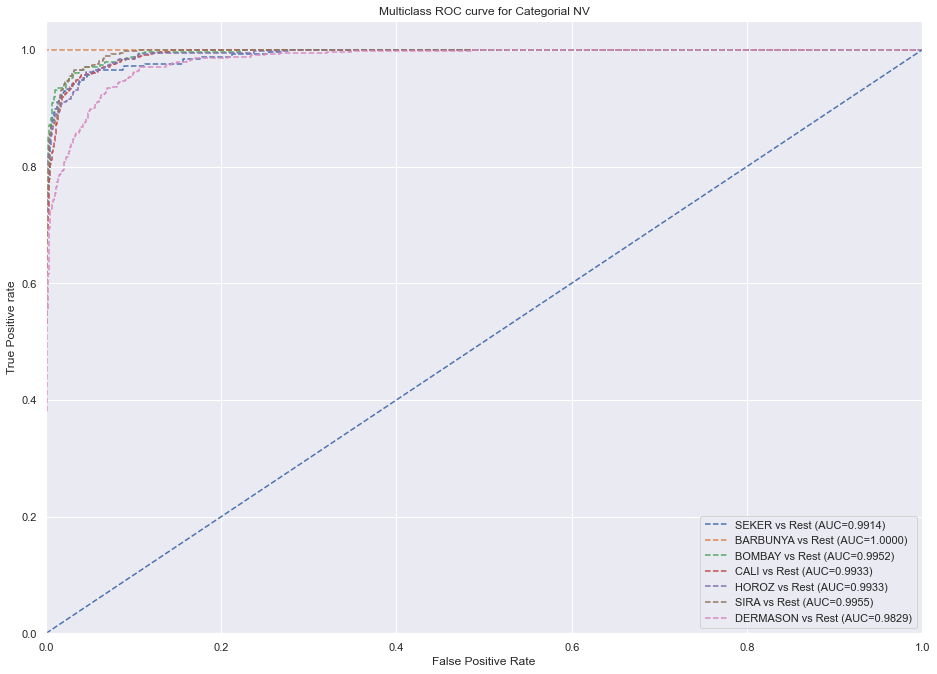

In [162]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

y_test_binarized=label_binarize(y_test_PCA,classes=np.unique(y_test_PCA))
# print(y_test_binarized)
fpr = {}   ## false positive rate 
tpr = {}  ## true positive rate 
thresh ={}  ## threshold
roc_auc = dict()

pred_prob = clf.predict_proba(X_test_PCA)   ## plotting the ROC curve of Categorial Naive Bayes after PCA

n_class = 7
classes = df['Class'].unique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='--', label='%s vs Rest (AUC=%0.4f)'%(classes[i],roc_auc[i]))
    ## For Plotting the printing the AOC values on the curve

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for Categorial NV')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()


## Reference Taken from scikit-learn.org

# This is ROC Curve and AOC values for the Categorial Naive Bayes model for different Classes. (After PCA)
# The ROC curve plots the true positive rates and false positive rates showing the performance of our model.


    

 


Even though our model has high AUC
The model is easily able to distinguish the BARBUNIYA beans from the other beans as it has highest AUC = 1.
Where as the model not easily able to distinguish DERMASON beans from other beans as it has lowest AUC = 0.9829.

#### g. Using Sklearn’s implementation of Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression(max_iter=10000)  ## Setting the number of epochs

y_train_LG = df[df.columns[16:17]]  ## Selecting the X and Y columns
X_train_LG = df[df.columns[0:16]]


# df[df.columns[16:17]]
X_train_LG, X_test_LG, y_train_LG, y_test_LG = train_test_split(X_train_LG,y_train_LG, test_size=0.2)
model.fit(X_train_LG, y_train_LG)   ## SK learn model


LogisticRegression(max_iter=10000)

In [164]:
y_pred_LG = model.predict(X_test_LG)   

model.score(X_test_LG, y_test_LG)


0.9173705471905986

In [165]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_LG, y_pred_LG))

print(classification_report(y_test_LG , y_pred_LG)) 

Accuracy Score 0.9173705471905986
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.88      0.91       280
      BOMBAY       1.00      1.00      1.00       102
        CALI       0.91      0.93      0.92       327
    DERMASON       0.91      0.93      0.92       714
       HOROZ       0.94      0.96      0.95       373
       SEKER       0.95      0.93      0.94       403
        SIRA       0.86      0.86      0.86       524

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



We have taken 10000 iterations for logistic regression
We are getting
Accuracy : 0.9210429673154609 
Precision : 0.92
Recall : 0.92
F-1 Score : 0.92

These results are better than the results obtained from The Naive Bayes models